## Kaggle : Predicting the House Sale Prices using Regression Techniques

``Sandile Shongwe``


"Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home."

In this notebook we are going to try and find out what factors contribute the most to the sale price of a house.

This work in this notebook has been largely motivated by the following notebooks:

1. [Comprehensive data exploration with Python - Pedro Marcelino](https://www.kaggle.com/dansbecker/xgboost)

2. [Simple linear regression models - Ricio Ventura](https://www.kaggle.com/rbyron/simple-linear-regression-models)

3. [Stacked Regressions : Top 4% on LeaderBoard - Seringe](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)

The notebook is divided into two main sections:
1. Exploration of the data
2. Implementation of Regression based Machine Learning models

Enjoy... =)


In [132]:
# importing necessary dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import time

%matplotlib inline
%xmode plain

sns.set()

Exception reporting mode: Plain


Firstly, we are going to import and have a look at the data.

In [133]:
# Loading both test and train data
df = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [134]:
df.shape ,df_test.shape

((1460, 81), (1459, 80))

In [135]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [136]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [137]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


## Task: Predict sales prices

Our data has about 80 Features. Because we can't look at all of them invidividually in relation to Sale Price. I have picked a few that I think would contribute heavily to the sale price:

• LandContour

• Overall Cond

• Year Built

• GarageArea

• Lot Area

• 1st Floor Area

• LivingArea

I chose these features based on my intuition although we can confirm this later with our models.

#### First we going to look at LandContour

Text(0.5,0,'GrLivArea')

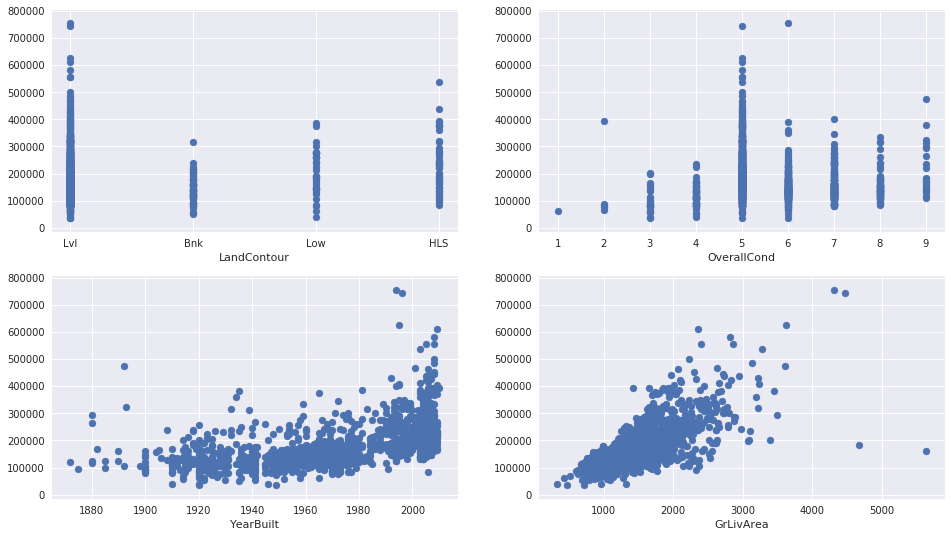

In [138]:
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222, sharey=ax1)
ax3 = fig.add_subplot(223, sharey=ax1)
ax4 = fig.add_subplot(224, sharey=ax1)
ax1.scatter(df['LandContour'], df['SalePrice'])
ax1.set_xlabel('LandContour')
ax2.scatter(df['OverallCond'], df['SalePrice'])
ax2.set_xlabel('OverallCond')
ax3.scatter(df['YearBuilt'], df['SalePrice'])
ax3.set_xlabel('YearBuilt')
ax4.scatter(df['GrLivArea'], df['SalePrice'])
ax4.set_xlabel('GrLivArea')

From the plots above we can see that ``Land Contour`` is not showing a clear relationship with the say prices. But we can kind of see that Level land has a lot of the houses that are highly priced.

Further the overall conditiion of the house is also not a clear indicator of the priec but we can kind of see that houses in better condition tend to sell at a higher. However, surprisingly we see that houses with a overall quality of 5 has has sold the most houses and some of the most expensive house have come from there.

We also note that the pricing tends to a have expontential relation with the year in which the house was build. 

Lastly, it is apparent from the 4th plot above that the sale price and the above size of the ground level living area have a liear relationship.

Let's look at a few more variables to get a better view of the data.

Text(0.5,0,'1stFlrSF')

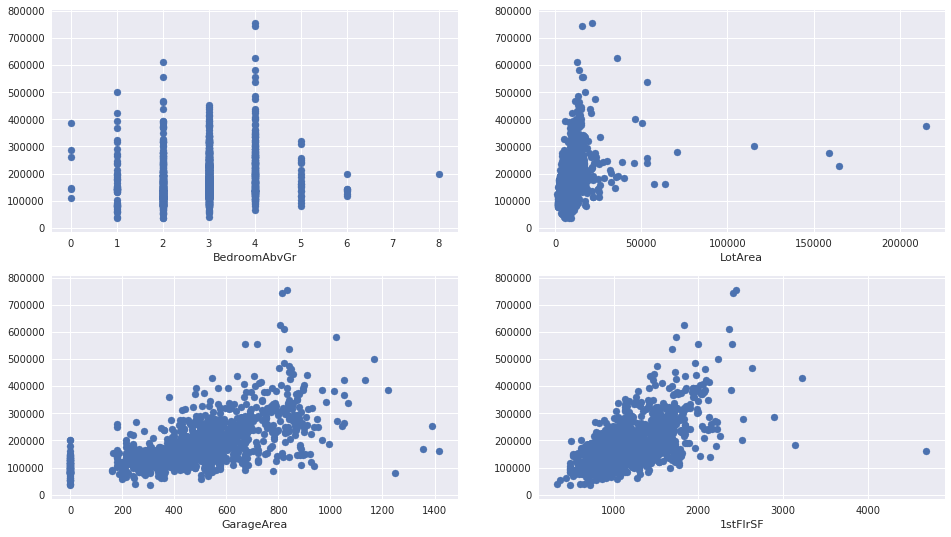

In [140]:
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222, sharey=ax1)
ax3 = fig.add_subplot(223, sharey=ax1)
ax4 = fig.add_subplot(224, sharey=ax1)
ax1.scatter(df['BedroomAbvGr'], df['SalePrice'])
ax1.set_xlabel('BedroomAbvGr')
ax2.scatter(df['LotArea'], df['SalePrice'])
ax2.set_xlabel('LotArea')
ax3.scatter(df['GarageArea'], df['SalePrice'])
ax3.set_xlabel('GarageArea')
ax4.scatter(df['1stFlrSF'], df['SalePrice'])
ax4.set_xlabel('1stFlrSF')

We see from more of the data that, the more area a lot, garage and the first floor has the more that house is going to cost.

The number of rooms don't necessarily have a relationship with the price. This makes sense because one house might have 2 bedrooms which are  equivalent in terms of total to the area of fours bedrooms in another house combined. 

To make things bit simpler. Let's plot a correlation heatmap to have a broader view into the data.

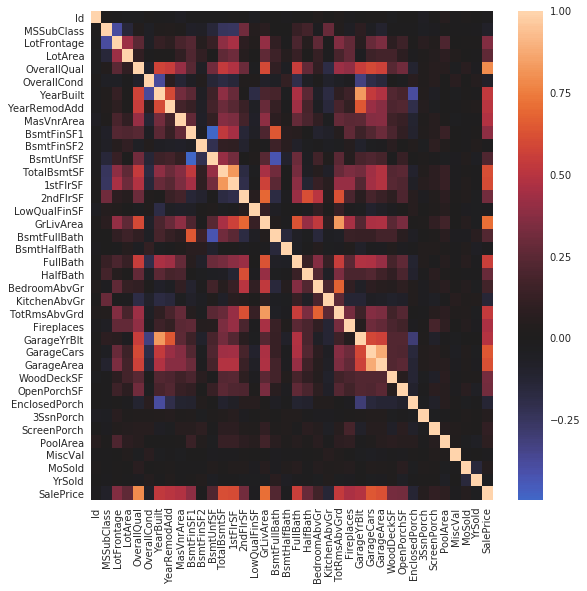

In [141]:
# Plotting correlation heatmap with the help of Seaborn
_, figcorr = plt.subplots(figsize = (9,9))
sns.heatmap(df.corr(), ax = figcorr, center = 0)

Looking at this somewhat overwhelming heatmap of the correlations we can see that as stated earlier variables such as Overall Quality, the size of the living area at Ground level and garage area have the highest correlation with the Sale Price of the house.

Let's look closer at the features that a meaningful correlation with the Sale Price.

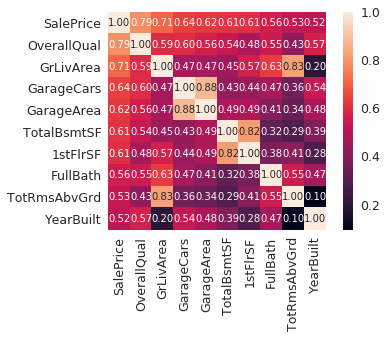

In [142]:
k = 10
corr = df.corr()
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)

sns.set(font_scale=1.25)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}
                , yticklabels=cols.values, xticklabels=cols.values)


From the above we can see which features are highly correlated with the sale price most of which we had already discovered. Further, these to features align with our intuition as to what would
make the sale price of a house cheaper or expensive.

This is very interesting because from the full heatmap a lot of the features don't see to contribute to the sale price. 

Let's further investigate the map the pairwise correlations of these variables.

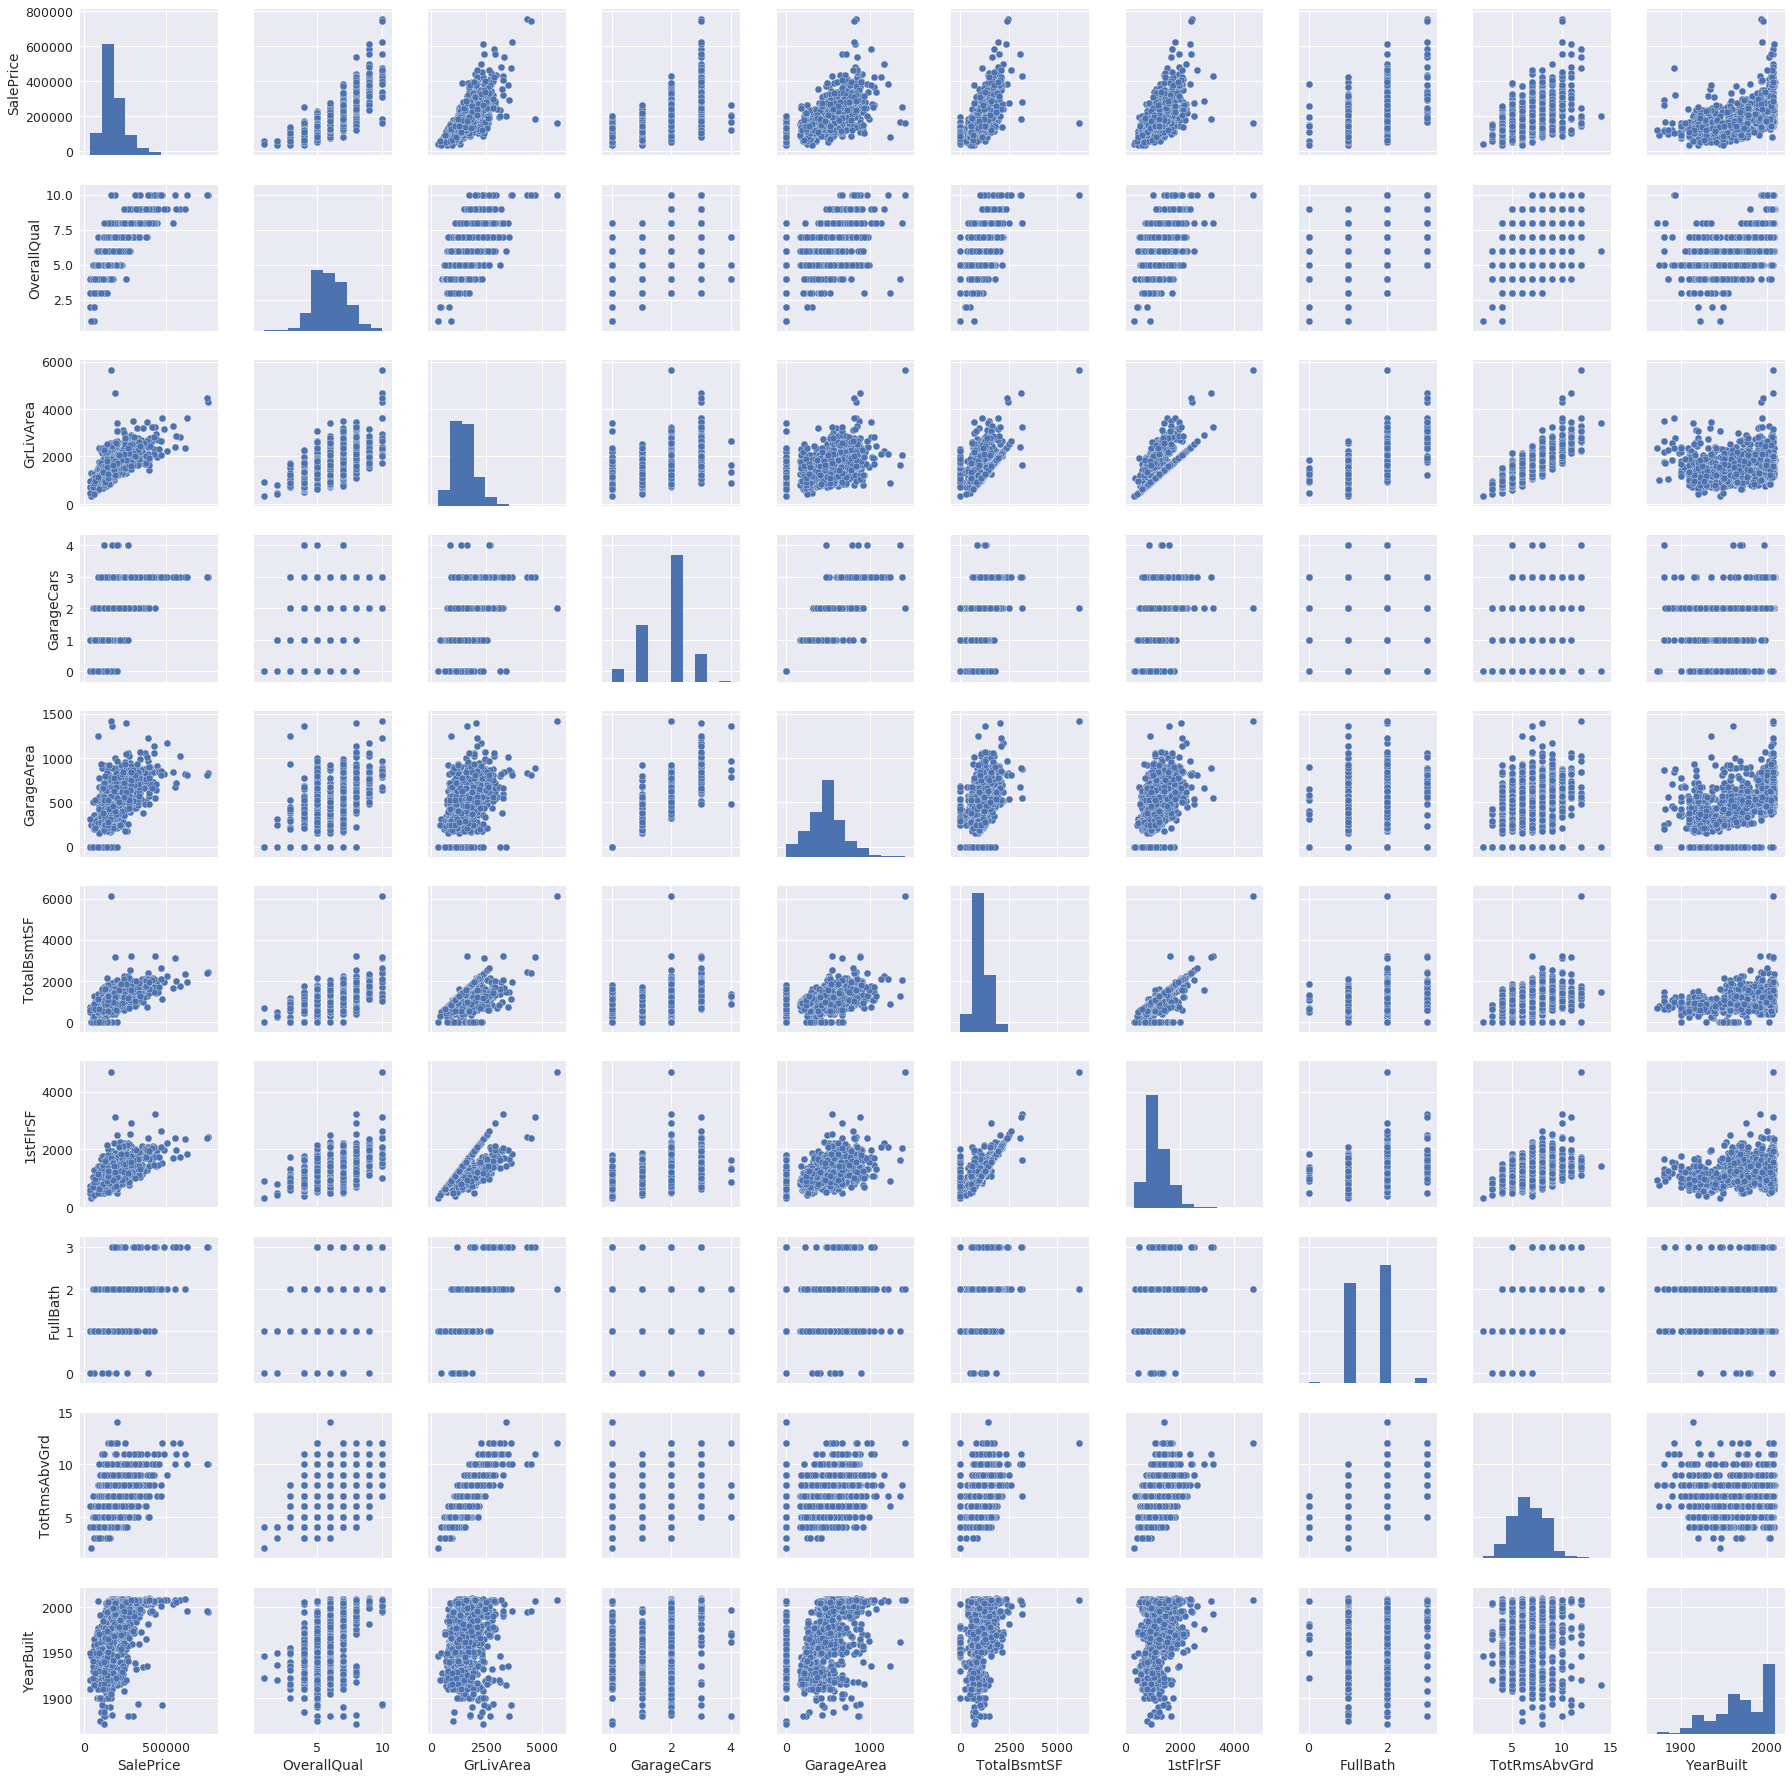

In [143]:
sns.pairplot(df[cols[:]], size=2.5)

The view is a lot clearer now. Some points worth noting:

♦ There is a large number of variables that seem to have linear relationships

♦ For instance the size of the first floor in Square feet and the ground living area.

♦ The Sqaure feet of the first floor and the total basement square feet

I could go on and on... it is just easier to look at the plots.


What we're are going to do next is to do some feature engineering in preparation for implementing our
models.

#### Data Preprocessing

Firstly we are going to find out which features have the most NaNs

In [144]:
# we combine the two data frames for the train and test data
# we split them later again, this makes the data preprocessing easier
y_train = df['SalePrice'].values
df = df.drop(columns=['SalePrice'])
dfc = pd.concat((df, df_test))
dfc.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [145]:
total = dfc.isnull().sum().sort_values(ascending=False)
percent = (dfc.isnull().sum()/dfc.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


Let's drop the features that have more that 10% of their data missing.

But aren't we going to miss any information in doing so?
Well... These features don't really contribute much to the sale price anyway. So I don't believe
that dropping them would severely impact our predictions.

We are going to do with the rest a back forward to cover up the NaNs. Although this process doesn't necessarily fill the NaNs with the correct values in practise it tends to help model learn better as opposed to dropping the entries with NaNs.

In [146]:
dfc = dfc.drop(columns=missing_data[missing_data['Percent'] > 0.1 ].index.values, axis=1)

In [147]:
dfc.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [148]:
dfc = dfc.fillna(method='bfill')

Now let's try to find outliers of the 10 features that are most correlated to Sale Price. Like before let's get a visual representation of this.

In [149]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

While taking a look at the pairplots for Sale Price from just a few cells above( I did note show these again for the sake of brevity), there are a few values that may seem like outliers but in reality they don't seem that far from the rest of the points. For now, I am not going to drop them. If our model performs poorly. We may have a look into removing them.

The next step here is to find dummy variables for our categorical data.

In [150]:
ids = dfc['Id']
dfc = dfc.drop(columns = ['Id'])
dfc = pd.get_dummies(dfc)

What we need to do next is apply the log transformation to our features so as to fix any skewness in the data that might affect our models.

More information on this can be found [here](http://onlinestatbook.com/2/transformations/log.html).

In [151]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dfc = pd.DataFrame(np.log1p(dfc.values), columns=dfc.columns )
# dfc = pd.DataFrame(sc.fit_transform(dfc.values), columns=dfc.columns )

It is common practise to split data into the training 
    and testing sets. So let's do just that.

In [152]:
x_train = dfc.iloc[0:df.shape[0], :].values
x_validation = dfc.iloc[df.shape[0]:, :].values

x_train, x_test , y_train, y_test = train_test_split(x_train, y_train,
                                                         test_size = 0.30,
                                                        random_state = 45
                                                        )
print(x_train.shape, x_validation.shape)

(1022, 269) (1459, 269)


Oh one last thing. Let's check how our target variable is distributed

We also need to transform our target variable to make sure that is not skewed and 
more robust to outliers. Typically a log is used to do this.

In [153]:
y_train = np.log1p(y_train.reshape(-1,1))
y_test = np.log1p(y_test.reshape(-1,1))

next ...!

## Implementing the models

We are going to implement 3 main techniques to estimate the sale of prices namely:
1. Neural Net using keras
2. Gradient Boosting technique using XGBoost
3. Linear Regression with and without regularization

#### 1. Neural Network using Keras

In [154]:
# importing dependencies
import tensorflow.keras as keras
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from eli5.sklearn import PermutationImportance
import eli5
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [155]:
# Defining Neural Network Model Structure

def make_model():
    
    model = keras.models.Sequential()

    model.add(keras.layers.Dense(units = 64 ,activation='relu', input_shape=x_train.shape[1:]))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Dense(units = 32, activation='relu'))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Dense(units = 16, activation='relu'))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Dense(units = 1))
    
    optim = keras.optimizers.SGD(lr = 0.001)
    model.compile(loss='mse', optimizer=optim, metrics=['mse'])
    
    return model


In [156]:
callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                  min_delta = 0,
                                  patience = 5,
                                  verbose = 0, 
                                  mode='auto')]

my_model = KerasRegressor(build_fn=make_model, verbose=0)
my_model.fit(x_train, y_train,  epochs = 1000 , verbose=0, validation_data=(x_test, y_test), callbacks = callbacks)

Weight,Feature
0.0745 ± 0.0124,2ndFlrSF
0.0564 ± 0.0129,MasVnrArea
0.0548 ± 0.0111,BsmtFinSF1
0.0395 ± 0.0069,OpenPorchSF
0.0382 ± 0.0133,BsmtUnfSF
0.0318 ± 0.0072,WoodDeckSF
0.0231 ± 0.0080,GarageArea
0.0155 ± 0.0068,TotalBsmtSF
0.0148 ± 0.0048,MSSubClass
0.0120 ± 0.0046,BsmtFinSF2


Permutation importance measures the importance of a feature by consdering the score of the model in the absence of the feature
https://eli5.readthedocs.io/en/latest/autodocs/sklearn.html#eli5.sklearn.permutation_importance.PermutationImportance
https://stackoverflow.com/questions/45361559/feature-importance-chart-in-neural-network-using-keras-in-python


In [174]:
perm = PermutationImportance(my_model, random_state=1).fit(x_train,y_train, verbose=0)
eli5.show_weights(perm, feature_names = dfc.columns.tolist())

Weight,Feature
0.0745 ± 0.0124,2ndFlrSF
0.0564 ± 0.0129,MasVnrArea
0.0548 ± 0.0111,BsmtFinSF1
0.0395 ± 0.0069,OpenPorchSF
0.0382 ± 0.0133,BsmtUnfSF
0.0318 ± 0.0072,WoodDeckSF
0.0231 ± 0.0080,GarageArea
0.0155 ± 0.0068,TotalBsmtSF
0.0148 ± 0.0048,MSSubClass
0.0120 ± 0.0046,BsmtFinSF2


We see that our neural network consider considers the following features to be important:<br/>
• 2ndFlrSF <br/>
• MasVnrArea <br/>
• BsmtFinSF1 <br/>
• OpenPorchSF <br/>
• BsmtUnfSF <br/>

The features don't really align with what the human considers when pricing a house. As can be seen by the graph below. The neural network is doing a poor job a predict the house prices.

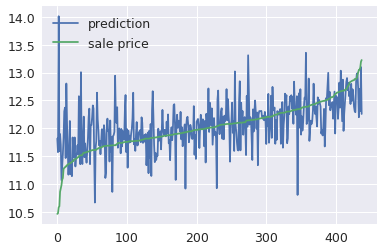

In [157]:
# sort the sale prices in ascending order and plot their respective predictions

y_pred = my_model.predict(x_test)

args = np.argsort(y_test.squeeze(1))

out  = [y_test.squeeze(1)[i] for i in args]
y_out = [y_pred[i] for i in args]

plt.plot(np.arange(len(args)), y_out, label='prediction')
plt.plot(np.arange(len(args)), out,  label='sale price')
plt.legend(loc='upper left')

#### 2. XGBoost

In [158]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import plot_importance


xgb = XGBRegressor(n=1000)
xgb.fit(x_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n=1000, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

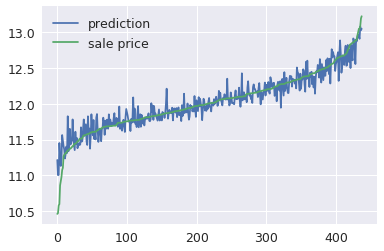

In [159]:
# sort the sale prices in ascending order and plot their respective predictions

y_pred = xgb.predict(x_test)

args = np.argsort(y_test.squeeze(1))

out  = [y_test.squeeze(1)[i] for i in args]
y_out = [y_pred[i] for i in args]

plt.plot(np.arange(len(args)), y_out, label='prediction')
plt.plot(np.arange(len(args)), out,  label='sale price')
plt.legend(loc='upper left')

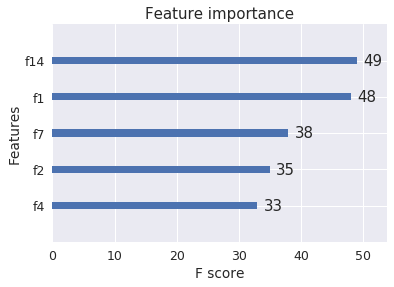

In [160]:
plot_importance(xgb, max_num_features=5)

According to XGBoost the following features matter the most:
    
• TotalBsmtSF F11 <br/>
• LotArea F2 <br/>
• MasVnrArea F7 <br/>
• MSSubClass F2 <br/>
• LowQualFinSF F14 <br/>

XGBoost seems to be doing a much better job at the prediction than the neural network.

#### 3. Regression Techniques

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV,  LassoCV

In [162]:
lg = LinearRegression()
lg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

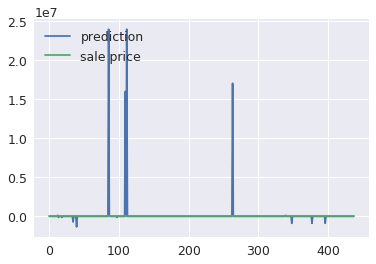

In [177]:
# sort the sale prices in ascending order and plot their respective predictions

y_pred = lg.predict(x_test)
args = np.argsort(y_test.squeeze(1))
out  = [y_test.squeeze(1)[i] for i in args]
y_out = [y_pred[i] for i in args]

plt.plot(np.arange(len(args)), y_out, label='prediction')
plt.plot(np.arange(len(args)), out,  label='sale price')
plt.legend(loc='upper left')

In [164]:
maxcoef = np.argsort(-np.abs(lg.coef_)).squeeze()

coef = lg.coef_[0][maxcoef-1]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(dfc.columns[maxcoef[i]], coef[i]))

Utilities_NoSeWa......... -9.2627e+07
Utilities_AllPub......... -2.8882e+07
Street_Grvl.............. -6.1368e+06
Street_Pave.............. -9.1654e+07
CentralAir_N.............  3.7277e+06


In [165]:
# Fitting a Lasso Regression Model

ls = LassoCV()
ls.fit(x_train, y_train.squeeze())

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

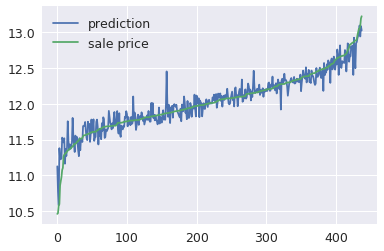

In [166]:
# sort the sale prices in ascending order and plot their respective predictions

y_pred = ls.predict(x_test)
args = np.argsort(y_test.squeeze(1))
out  = [y_test.squeeze(1)[i] for i in args]
y_out = [y_pred[i] for i in args]

plt.plot(np.arange(len(args)), y_out, label='prediction')
plt.plot(np.arange(len(args)), out,  label='sale price')
plt.legend(loc='upper left')

In [167]:
maxcoef = np.argsort(-np.abs(ls.coef_))
coef = ls.coef_[maxcoef]

for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(dfc.columns[maxcoef[i]], coef[i]))


RoofMatl_ClyTile......... -1.0777e+00
Condition2_PosN.......... -6.3322e-01
GrLivArea................  4.2188e-01
OverallQual..............  2.7663e-01
OverallCond..............  2.3732e-01


In [168]:
# fiting a Ridge Regression Model

rg = RidgeCV()
rg.fit(x_train, y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

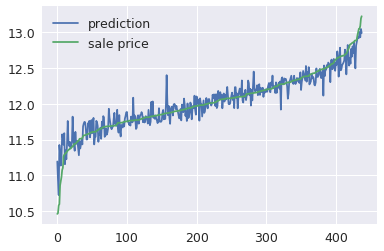

In [169]:
# sort the sale prices in ascending order and plot their respective predictions

y_pred = rg.predict(x_test)
args = np.argsort(y_test.squeeze(1))
out  = [y_test.squeeze(1)[i] for i in args]
y_out = [y_pred[i] for i in args]

plt.plot(np.arange(len(args)), y_out, label='prediction')
plt.plot(np.arange(len(args)), out,  label='sale price')
plt.legend(loc='upper left')

In [183]:
maxcoef = np.argsort(-np.abs(rg.coef_).squeeze())
coef = rg.coef_.squeeze()[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(dfc.columns[maxcoef[i]], coef[i]))

GrLivArea................  2.1228e-01
OverallQual..............  1.9459e-01
OverallCond..............  1.6209e-01
1stFlrSF.................  1.3996e-01
Neighborhood_Edwards..... -1.0982e-01


For the regression methods we see that:<br/>
• standard linear regression fails as we can clearly see that for
some instance it severely over-estimates and for some instance it severely underestimates.<br/>
• Lasso Regression and Ridge Regression seem to be doing a much better job at estimating and their performance appears to be very similar.<br/>
• Lasso Regression and Ridge Regression are performing better than XGBoost and The neural net <br>
• The two latter regression methods have the following features to be of importance:<br/>
      
        ○ GrLivArea 
        ○ OverallQual 
        ○ OverallCond 
This kind of makes sense because overall quality and condition factors in a lot of other variables.


#### Conclusion 

From this notebook, we can conclude that Regression with regularization performs better at estimating the price of a house given how our data has been preprocessed.

In terms of ranking the most notable ranking achieve were the following: <br/>
• Top 57% with XGBoost <br/>
• Top 53% with Lasso Regression <br/>
• Top 39% with the average predictions from Lasso Regression and Ridge Regression.



#### Submission

In [171]:
'''we're exponentiating the prediction to reverse the log transformation applied
 to the target during training'''
y_pred_ls = np.exp(ls.predict(x_validation)) 
y_pred_lg = np.exp(rg.predict(x_validation).squeeze())
print(y_pred_lg)
y_pred_ave = (y_pred_ls + y_pred_lg)/2

submit = pd.DataFrame({'Id': ids[df.shape[0]:].values, 'SalePrice':y_pred_ave})
submit.to_csv('submission'+str(time.time())+'.csv', index=False)
submit.head(10)


[121569.96258658 154887.96755235 185645.65680591 ... 171095.21623894
 118528.57133494 218103.8262865 ]


,Id,SalePrice
0,1461,120298.258097
1,1462,154980.706081
2,1463,184258.898634
3,1464,199923.388636
4,1465,199136.222899
5,1466,169917.650579
6,1467,171953.482267
7,1468,160466.871240
8,1469,197263.352932
9,1470,118792.124680
